***Парсинг сайта pk.mpei.ru и анализ конкурсной ситуации на магистратуре ПМИ(1 волна)***



In [128]:
import pandas as pd
# Выгружаем табличку с сайта в фрейм
url = r'https://pk.mpei.ru/inform/list95magc.html'
tables = pd.read_html(url)
competition_PMI_table = tables[0]
competition_PMI_table.head()

СНИЛС или Рег.номер Сумма Сумма без ИД Баллы ВИ*  ИД Преимущ. право**  \
  СНИЛС или Рег.номер Сумма Сумма без ИД ВИ в маг.  ИД        ч.9 ст.71   
0  СНИЛС: 16903943896  97.0         97.0      97.0   0              нет   
1  СНИЛС: 17554653801  96.0         80.0      80.0  16              нет   
2  СНИЛС: 21002023149  93.0         93.0      93.0   0              нет   
3  СНИЛС: 17795073220  93.0         88.0      88.0   5              нет   
4  СНИЛС: 19551547298  92.0         92.0      92.0   0              нет   

             Оригинал Договор Приоритет Приоритет высший Общежитие Примечание  
  ч.10 ст.71 Оригинал Договор Приоритет Приоритет высший Общежитие Примечание  
0        нет      нет     нет         1              NaN       б/о        NaN  
1        нет      нет     нет         1              NaN       б/о        NaN  
2        нет      нет     нет         1              NaN       с/о        NaN  
3        нет      нет     нет         1              NaN       с/о        NaN  
4        нет      нет     нет         1              NaN       б/о        NaN

In [129]:
# Чистим дублирующиеся параметры и/или не нужные
competition_PMI_table = competition_PMI_table.drop(['Сумма без ИД','Оригинал','Договор','Примечание','Приоритет высший','Преимущ. право**'],axis=1)
competition_PMI_table.head()

<ipython-input-129-1f0bb97acd68>:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  competition_PMI_table = competition_PMI_table.drop(['Сумма без ИД','Оригинал','Договор','Примечание','Приоритет высший','Преимущ. право**'],axis=1)


,СНИЛС или Рег.номер,Сумма,Баллы ВИ*,ИД,Приоритет,Общежитие
,СНИЛС или Рег.номер,Сумма,ВИ в маг.,ИД,Приоритет,Общежитие
0,СНИЛС: 16903943896,97.0,97.0,0,1,б/о
1,СНИЛС: 17554653801,96.0,80.0,16,1,б/о
2,СНИЛС: 21002023149,93.0,93.0,0,1,с/о
3,СНИЛС: 17795073220,93.0,88.0,5,1,с/о
4,СНИЛС: 19551547298,92.0,92.0,0,1,б/о


In [130]:
# Изменяем названия столбцов в табличке на более простые
competition_PMI_table.columns = ['СНИЛС', 'СУММА', 'ВИ', 'ИД', 'Приоритет','Общежитие']
competition_PMI_table.head()

,СНИЛС,СУММА,ВИ,ИД,Приоритет,Общежитие
0,СНИЛС: 16903943896,97.0,97.0,0,1,б/о
1,СНИЛС: 17554653801,96.0,80.0,16,1,б/о
2,СНИЛС: 21002023149,93.0,93.0,0,1,с/о
3,СНИЛС: 17795073220,93.0,88.0,5,1,с/о
4,СНИЛС: 19551547298,92.0,92.0,0,1,б/о


In [131]:
# Итерирование по столбцу 'СНИЛС' и изменение значений на исключительно численные
for index, value in competition_PMI_table['СНИЛС'].items():
    if value.startswith('СНИЛС: '):
        new_value = value.replace('СНИЛС: ', '')
        competition_PMI_table.at[index, 'СНИЛС'] = new_value
competition_PMI_table.head()

,СНИЛС,СУММА,ВИ,ИД,Приоритет,Общежитие
0,16903943896,97.0,97.0,0,1,б/о
1,17554653801,96.0,80.0,16,1,б/о
2,21002023149,93.0,93.0,0,1,с/о
3,17795073220,93.0,88.0,5,1,с/о
4,19551547298,92.0,92.0,0,1,б/о


In [141]:
# Итерирование по столбцу 'Общежитие' и изменение значений на исключительно численные
# 1 - необходимо общежитие.
# 0 - общежитие не нужно.
competition_PMI_table['Общежитие'] = competition_PMI_table['Общежитие'].replace({'б/о': 0, 'с/о': 1}).astype(int)
competition_PMI_table.head()

,СНИЛС,СУММА,ВИ,ИД,Приоритет,Общежитие
0,16903943896,97.0,97.0,0,1,0
1,17554653801,96.0,80.0,16,1,0
2,21002023149,93.0,93.0,0,1,1
3,17795073220,93.0,88.0,5,1,1
4,19551547298,92.0,92.0,0,1,0


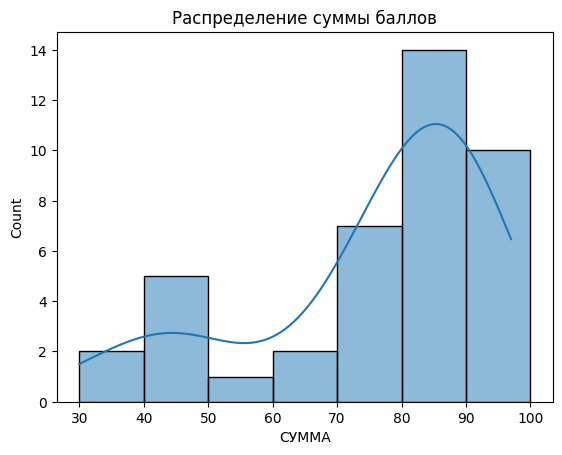

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

# Визуализируем распределение баллов
sns.histplot(data=competition_PMI_table,x='СУММА',kde=True,bins=range(30, 101, 10), binwidth=10)
plt.title('Распределение суммы баллов')
plt.show()

# Наблюдения
Более 75% абитуриентов имеют балл от 70 до 100. В среднем ~85.

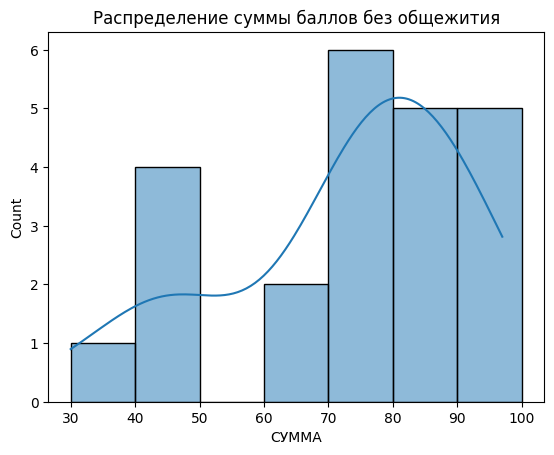

In [134]:
filtered = competition_PMI_table[competition_PMI_table['Общежитие'] == 0]
sns.histplot(data=filtered,x='СУММА',kde=True,bins=range(30, 101, 10))
plt.title('Распределение суммы баллов без общежития')
plt.show()

# Наблюдения
Абитуриенты без общежития имеют почти весь диапазон баллов, который довольно плавно распределен. В среднем ~80 баллов, что меньше среднего по всем поступающим.

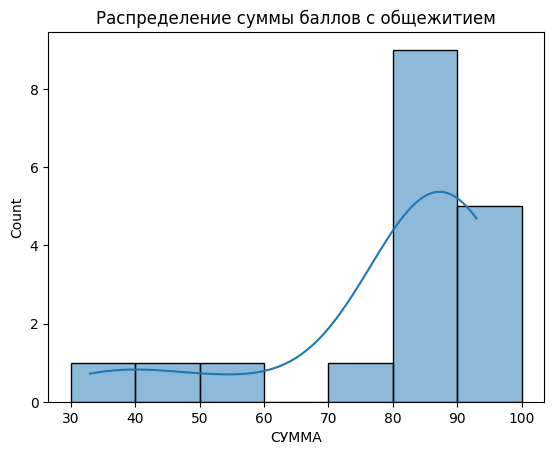

In [135]:
filtered = competition_PMI_table[competition_PMI_table['Общежитие'] == 1]
sns.histplot(data=filtered,x='СУММА',bins=range(30, 101, 10),kde=True)
plt.title('Распределение суммы баллов с общежитием')
plt.show()

# Наблюдения
Абитуриенты притендующие на общежитие имеют почти весь диапазон баллов, но большинство имеет от 80-100 баллов, что говорит о бОльшой вероятности получения общежития. В среднем ~87 баллов, что больше, чем получит среднестатистический поступающий.

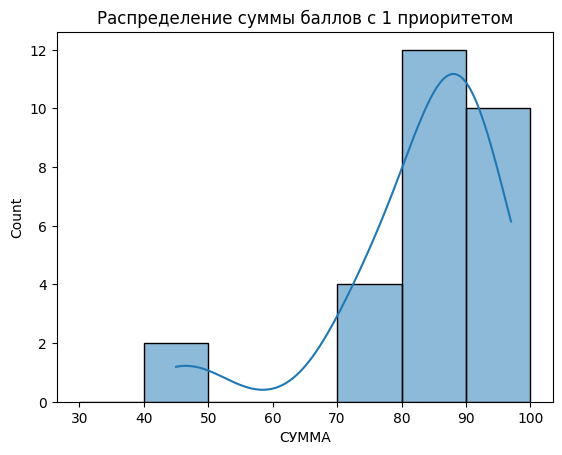

In [136]:
filtered = competition_PMI_table[competition_PMI_table['Приоритет'] == 1]
sns.histplot(data=filtered,x='СУММА',bins=range(30, 101, 10),kde=True)
plt.title('Распределение суммы баллов с 1 приоритетом')
plt.show()

# Наблюдения
Суммы баллов абитуриентов первого приоритета сосредоточены в диапазоне между 40 и 100, однако большая часть располагается от 70 до 100. В среднем ~87 баллов, что больше среднего по всем поступающим.

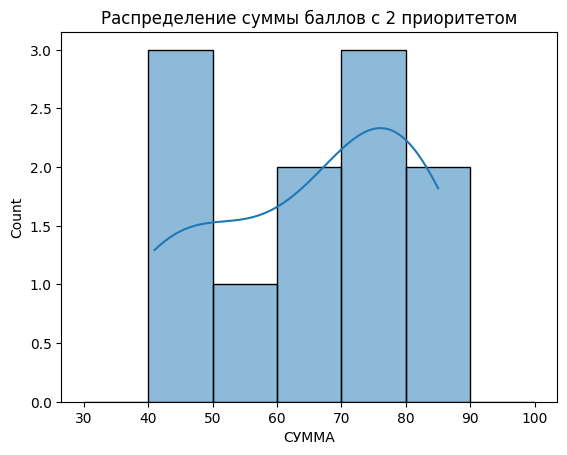

In [137]:
filtered = competition_PMI_table[competition_PMI_table['Приоритет'] == 2]
sns.histplot(data=filtered,x='СУММА',bins=range(30, 101, 10),kde=True)
plt.title('Распределение суммы баллов с 2 приоритетом')
plt.show()

# Наблюдения
Суммы баллов абитуриентов второго приоритета сосредоточены в диапазоне между 40 и 90, что довольно широко. В среднем ~75 баллов.

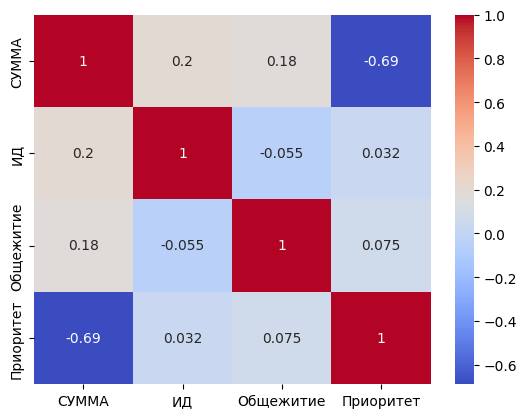

In [145]:
corr_matrix = competition_PMI_table[['СУММА','ИД','Общежитие', 'Приоритет']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Наблюдения
*   Наблюдается довольно сильная корреляция между приоритетом и суммой баллов по вступительным испытаниям. В т.ч. чем выше приоритет, тем выше баллы у абитуриента
*   Слабая корреляция между суммой баллов и необходимостью в общежитие, а также между суммой баллов и ИД.
* Корреляция отсутствует между ИД и необходимостью в общежитии, ИД и приоритетом, общежитием и приоритетом.
